In [41]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  all


Command 'all' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  all


       | 
       | Downloading package abc to /usr/share/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /usr/share/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /usr/share/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /usr/share/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to
       |     /usr/share/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package biocreative_ppi to
       |     /usr/share/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to
       |     /usr/share/nltk_data...
       |   Package bllip_wsj_no_aux is already u


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


True

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk.stem
from nltk.stem import LancasterStemmer
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import shutil
import warnings
warnings.filterwarnings(action="ignore")
import re, string
from sklearn.feature_extraction.text import TfidfVectorizer

## Reading Dataset

In [43]:
data= pd.read_csv("../input/sentiment140/training.1600000.processed.noemoticon.csv",encoding="Latin")

In [44]:
data.columns = ["class","ID","Day","no_Query","username",'text']

In [45]:
data = data[["class","text"]]

In [46]:
## Selecting only 10000 data out of total
data = data.groupby('class', 
                group_keys=False).apply(lambda x: x.sample(int(np.rint(10000*len(x)/len(data))))).sample(frac=1).reset_index(drop=True)

In [47]:
data['class'].value_counts()

0    5000
4    5000
Name: class, dtype: int64

In [48]:
data["class"] = data["class"].replace({4:1,0:0})

In [49]:
data['class'].value_counts()

0    5000
1    5000
Name: class, dtype: int64

## Data preparation for Naive Baiyes

In [50]:
## Storing negative and positive tweets in different dataframe
negative_tweet = data[data["class"] == 0]
positive_tweet = data[data["class"] == 1]

In [51]:
negative_tweets = negative_tweet["text"].tolist()
positive_tweets = positive_tweet["text"].tolist()

In [52]:
negative_tweets[0]

'well, i made it down to 663 emails. helluva day '

In [53]:
def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('^@http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(^@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words :
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [54]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)
print('\n')
print(remove_noise(word_tokenize(positive_tweets[0]),stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [55]:
## creating tokens
positive_tweet_tokens = []
negative_tweet_tokens = []
for sentence in positive_tweets:
    positive_tweet_tokens.append(word_tokenize(sentence))
for sentence in negative_tweets:
    negative_tweet_tokens.append(word_tokenize(sentence))

In [56]:
positive_tweet_tokens[0]

['@',
 'racheleoverseas',
 'Well',
 'it',
 "'s",
 'proportionally',
 'less',
 'messy',
 '.',
 'It',
 "'s",
 'a',
 'cunning',
 'plan',
 'worthy',
 'of',
 'a',
 'Post',
 'Doc']

In [57]:
## removing noise such as stopwords and punctuations from data
positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

In [58]:
positive_cleaned_tokens_list[0]

['racheleoverseas',
 'well',
 "'s",
 'proportionally',
 'less',
 'messy',
 "'s",
 'cunning',
 'plan',
 'worthy',
 'post',
 'doc']

In [59]:
## getting data in format for naive baiyes
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

In [60]:
import random

positive_dataset = [(tweet_dict, "Positive")
                     for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative")
                     for tweet_dict in negative_tokens_for_model]
#print(positive_dataset)
dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:7000]
test_data = dataset[3000:]
#train_data

In [61]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("Training Accuracy is:", classify.accuracy(classifier, train_data))
print("Tesing  Accuracy is:", classify.accuracy(classifier, test_data))


print(classifier.show_most_informative_features(10))

Training Accuracy is: 0.9368571428571428
Tesing  Accuracy is: 0.839
Most Informative Features
                    sick = True           Negati : Positi =     19.1 : 1.0
                    lose = True           Negati : Positi =     11.8 : 1.0
                     sad = True           Negati : Positi =     11.8 : 1.0
                    fail = True           Negati : Positi =     11.2 : 1.0
                  throat = True           Negati : Positi =     11.2 : 1.0
                     ugh = True           Negati : Positi =     10.1 : 1.0
                   bored = True           Negati : Positi =      9.9 : 1.0
                    hurt = True           Negati : Positi =      9.3 : 1.0
                    poor = True           Negati : Positi =      9.2 : 1.0
                    sore = True           Negati : Positi =      9.2 : 1.0
None


In [62]:
from nltk.tokenize import word_tokenize

custom_tweet = "@defenestr8 107 degrees dry heat? I'll take it eff this goddamn 102 degree heat index with 60%+ humidity"
custom_tokens = remove_noise(word_tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

Positive


## Data preparation for any Machine Learing Algorithm

In [63]:
## remove stopwords and punctuation marks
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
## corpus is all the data in Consumer complaint narrative
corpus = data['text'].tolist()
print(len(corpus))
print(corpus[1])

10000
This is the week I put my PowerBook G4 to rest.  Bittersweet, but new Macbook is only way I'll get anything done besides browse the Web.


In [64]:
final_corpus = []
for i in range(len(corpus)):
  word = word_tokenize(corpus[i].lower())
  word = [stemmer.stem(y) for y in word if y not in stuff_to_be_removed]
  j = " ".join(word)
  final_corpus.append(j)
final_corpus[1]

"week put powerbook g4 rest bittersweet new macbook way 'll get anyth don besid brows web"

In [65]:
classes=data['class'].tolist()
newdf = pd.DataFrame(final_corpus)
newdf['class'] = classes
newdf.columns=['text','class']
newdf.head()

,text,class
0,wel mad 663 email helluv day,0
1,week put powerbook g4 rest bittersweet new mac...,0
2,look forward school,0
3,legallyblonde34 would ... class til 9pm night ...,0
4,racheleoversea wel 's proport less messy 's cu...,1


In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [67]:
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(newdf['text'])
print(type(vector))
X = vector.toarray()
print(X)
y= newdf['class']

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [68]:
## Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify = y)

In [69]:
def metrics(y_train,y_train_pred,y_test,y_test_pred):
    print("training accuracy = ",accuracy_score(y_train,y_train_pred)*100)
    ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
    print(classification_report(y_train,y_train_pred))
    plt.show()

    print("testing accuracy = ",accuracy_score(y_test,y_test_pred)*100)
    ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
    print(classification_report(y_test,y_test_pred))
    plt.show()

In [70]:
MNB = MultinomialNB()
MNB.fit(X_train,y_train)
y_train_pred = MNB.predict(X_train)
y_test_pred = MNB.predict(X_test)

training accuracy =  91.43283582089552
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3350
           1       0.93      0.89      0.91      3350

    accuracy                           0.91      6700
   macro avg       0.92      0.91      0.91      6700
weighted avg       0.92      0.91      0.91      6700



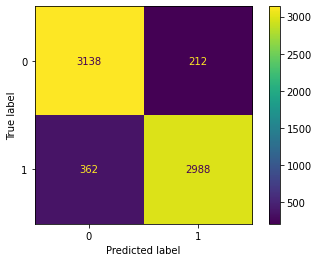

testing accuracy =  71.7878787878788
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1650
           1       0.74      0.66      0.70      1650

    accuracy                           0.72      3300
   macro avg       0.72      0.72      0.72      3300
weighted avg       0.72      0.72      0.72      3300



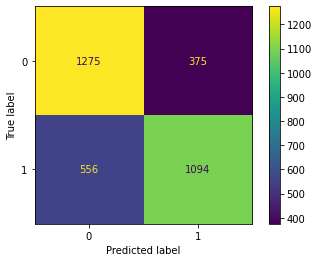

In [71]:
metrics(y_train,y_train_pred,y_test,y_test_pred)

In [72]:
svc = LinearSVC()
svc.fit(X_train,y_train)
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

training accuracy =  97.50746268656715
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3350
           1       0.97      0.98      0.98      3350

    accuracy                           0.98      6700
   macro avg       0.98      0.98      0.98      6700
weighted avg       0.98      0.98      0.98      6700



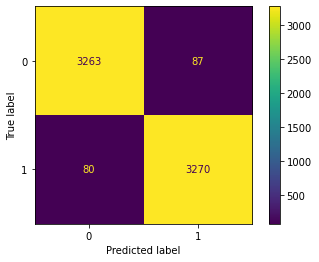

testing accuracy =  71.27272727272728
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1650
           1       0.71      0.72      0.71      1650

    accuracy                           0.71      3300
   macro avg       0.71      0.71      0.71      3300
weighted avg       0.71      0.71      0.71      3300



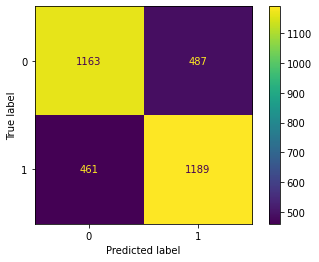

In [73]:
metrics(y_train,y_train_pred,y_test,y_test_pred)

In [74]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=3)
RFC.fit(X_train,y_train)
y_train_pred = RFC.predict(X_train)
y_test_pred = RFC.predict(X_test)

training accuracy =  78.97014925373135
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      3350
           1       0.75      0.87      0.81      3350

    accuracy                           0.79      6700
   macro avg       0.80      0.79      0.79      6700
weighted avg       0.80      0.79      0.79      6700



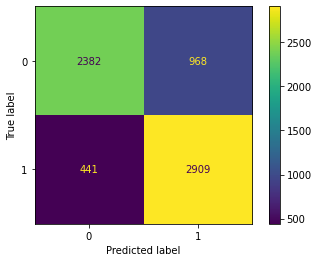

testing accuracy =  70.51515151515152
              precision    recall  f1-score   support

           0       0.74      0.63      0.68      1650
           1       0.68      0.78      0.72      1650

    accuracy                           0.71      3300
   macro avg       0.71      0.71      0.70      3300
weighted avg       0.71      0.71      0.70      3300



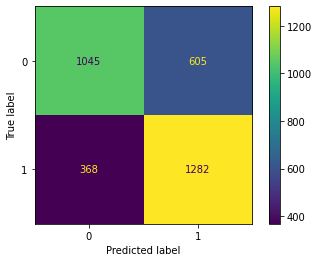

In [75]:
metrics(y_train,y_train_pred,y_test,y_test_pred)